In [2]:
# Makes report plot
# improt and define basic params
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from pathlib import Path
from os import listdir, path, makedirs
sns.set(style="darkgrid")
%matplotlib inline

# Calibrated data dir
calibrated_base_dir = Path("..")/"../new_calibrate_full/"
uncalibrated_base_dir = Path("..")/"../uncalibrated_data/"
calibration_curve_base_dir = Path("..")/"../calibration_curve/"
calibrated_table_dir = Path("..")/"../tables/"
uncalibrated_table_dir = Path("..")/"../uncalibrated_tables/"

# Class to use
import sys
sys.path.append("../../python")
from auditing_setup.election_setting import Election

In [3]:
mpl.rcParams["figure.figsize"] = [8, 6]

In [4]:
def read_csv(file_path, sort_index=True, transpose=True):
    df = pd.read_csv(file_path)
    cols = []
    for i in df.columns:
        try:
            cols.append(float(i))
        except Exception as e:
            cols.append(i)
    df.columns = cols
    df.index.set_names("election", inplace=True)
    df.set_index("legend", inplace=True)
    if sort_index:
        df.sort_index(inplace=True)
    if transpose:
        df = df.transpose()
    return df

def get_num_cols(df):
    cols = []
    for i in df.columns:
        try:
            float(i)
            cols.append(float(i))
        except Exception as e:
            pass
    return cols

def format_legend(ax=None, legend=None, how=0):
    if ax is not None:
        legend_ = ax.legend_
    elif legend is not None:
        legend_ = legend
    else:
        return
    
    for text in legend_.texts:
        if how == 0:
            raw = text.get_text()
            text.set_text(raw.replace(" | ", ", ").replace(" ", "").rsplit(",", 1)[0])
        elif how == 1:
            raw = text.get_text()
            print(raw.rsplit(",", 1)[0].replace("_", " "))
            text.set_text(raw.rsplit(",", 1)[0].replace("_", " "))
    return legend_

In [5]:
cols = sns.color_palette("hls", 6)
cs_dict = {'bayesian | a=1 | b=1':cols[0],
           'bayesian_with_replacement | a=1 | b=1':cols[0],
           'bravo    | p=0.55':cols[1],
           'bravo    | p=0.7':cols[1],
           'bravo_without_replacement | p=0.55':cols[2],
           'bravo_without_replacement | p=0.7':cols[2],
           'clip    ':cols[3], 
           'max_sprt':cols[4],
           'truncated_bayesian | a=1 | b=1':cols[5]}

# ls_dict = {'bayesian | a=1 | b=1':'-',
#            'bayesian_with_replacement | a=1 | b=1':'--',
#            'bravo    | p=0.55':'-',
#            'bravo    | p=0.7':'--',
#            'bravo_without_replacement | p=0.55':'-',
#            'bravo_without_replacement | p=0.7':'--',
#            'clip    ':'--', 
#            'max_sprt':'--',
#            'truncated_bayesian | a=1 | b=1':'--'}
ls_dict = {'bayesian | a=1 | b=1':'-',
           'bayesian_with_replacement | a=1 | b=1':'-',
           'bravo    | p=0.55':'-',
           'bravo    | p=0.7':'-',
           'bravo_without_replacement | p=0.55':'-',
           'bravo_without_replacement | p=0.7':'-',
           'clip    ':'-', 
           'max_sprt':'-',
           'truncated_bayesian | a=1 | b=1':'-'}

ms_dict = {'bayesian | a=1 | b=1':'o',
           'bayesian_with_replacement | a=1 | b=1':'s',
           'bravo    | p=0.55':'<',
           'bravo    | p=0.7':'>',
           'bravo_without_replacement | p=0.55':'P',
           'bravo_without_replacement | p=0.7':'X',
           'clip    ':'o', 
           'max_sprt':'o',
           'truncated_bayesian | a=1 | b=1':'o'}

In [6]:
def map_styles(legends):
    cs, ls, ms = [], [], []
    for legend in legends:
        legend = legend.rsplit(" | ", 1)[0]
        ls.append(ls_dict[legend])
        cs.append(cs_dict[legend])
        ms.append(ms_dict[legend])
    return cs, ls, ms

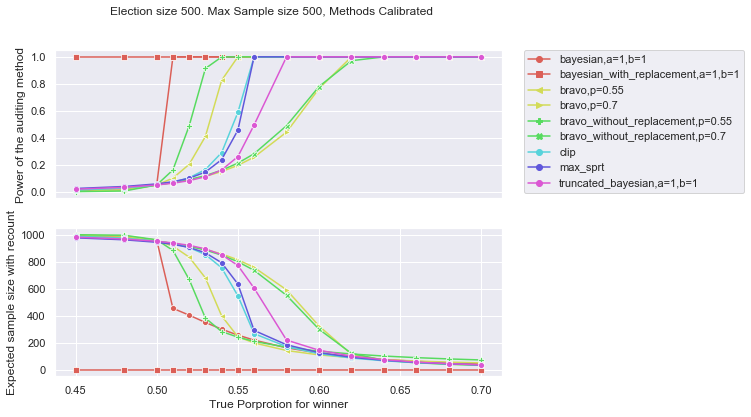

In [9]:
# 1. Basic 500/500 plot without replacement
# data
election = Election(500, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Election size 500. Max Sample size 500, Methods Calibrated")

data_type = "power.csv"
data_path = calibrated_table_dir/str(election)/data_type
data_df = read_csv(data_path)

ax = fig.add_subplot(211)
cs, ls, ms = map_styles(data_df.columns)
sns.lineplot(data=data_df, dashes=False, markers=ms, palette=cs, legend="full", ax=ax)
ax.xaxis.set_visible(False)
ax.yaxis.label.set_text("Power of the auditing method")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax)

data_type = "unconditional_mean_with_recount.csv"
data_path = calibrated_table_dir/str(election)/data_type
data_df = read_csv(data_path)

ax = fig.add_subplot(212)
cs, ls, ms = map_styles(data_df.columns)
sns.lineplot(data=data_df, dashes=False, markers=ms, palette=cs, legend=False, ax=ax)
ax.xaxis.label.set_text("True Porprotion for winner")
ax.yaxis.label.set_text("Expected sample size with recount")

bravo without replacement p=0.7
bayesian with replacement a=1 b=1 critical
bravo p=0.7
clip
truncated bayesian a=1 b=1 critical
bravo without replacement p=0.55
max sprt
bayesian a=1 b=1 critical
bravo p=0.55


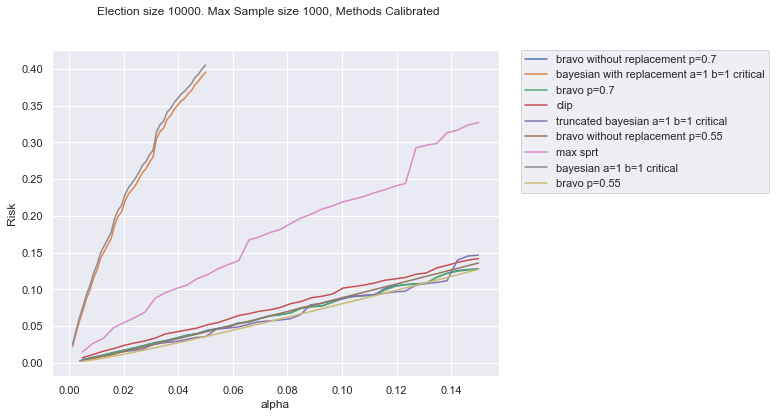

In [8]:
# Calibration Curve
# 1. Basic 5000/500 plot without replacement
# data
election = Election(10000, 1000, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Election size 10000. Max Sample size 1000, Methods Calibrated")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

for method_data in data_path.iterdir():
    method, param, _ = method_data.stem.rsplit("_", 2)
    param = param.split("=")[0]
    data_df = pd.read_csv(method_data)
    data_df.columns = [param, method]
    data_df.set_index(param, inplace=True)
    sns.lineplot(x=data_df.index, y=data_df[method], label=method, ax=ax)

    ax.xaxis.label.set_text(param)
    ax.yaxis.label.set_text("Risk")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

bravo without replacement | p=0.55 | alpha=0.076044921875
bravo without replacement | alpha=0.05 | p=0.55


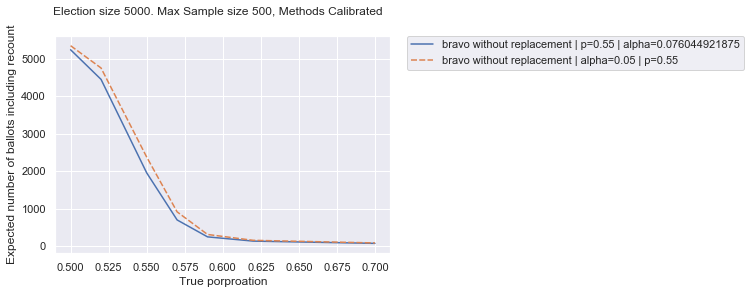

In [246]:
# 3. Comparisoon between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Election size 5000. Max Sample size 500, Methods Calibrated")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

data1_path = '/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/calibrated_data/n=005000_m=00500_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_unconditional_mean_with_recount.csv'
data1 = read_csv(data1_path)
data2_path = '/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/uncalibrated_data/election_n=005000_m=00500_replacement=False_step=1/bravo_without_replacement/bravo_without_replacement_unconditional_mean_with_recount.csv'
data2 = read_csv(data2_path)
data = data1.join(data2)
data = data.iloc[:, [0,2]]


sns.lineplot(data=data, ax=ax)
ax.xaxis.label.set_text("True porproation")
ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)